In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats                                                         

In [87]:
mpl.rcParams["figure.figsize"] = (18, 6)

### Central limit theorem
Suppose we have a distribution with population mean, $\mu$ and population variance, $\sigma^2$ but we do not know the distribution of the population. If we take samples of size $n$ from the population, and let's say that the sample mean is $\mu_s$. The central limit theorem states that the sample mean is normally distributed. This means that if we take multiple samples from any distribution, then the means of the samples will be normally distributed. Further, the mean of the sampling distribution will be equal to the population mean, $\mu$, and standard deviation will be $\frac{\sigma}{\sqrt{n}}$. Hence, the variance of sampling distribution decreases as the sample size increases. 

In [102]:
# generating samples from uniform distribution
def uniform(sample_size):
    return np.random.rand(sample_size)

# generating samples from exponential distribution
def exponential(sample_size):
    return np.random.exponential(size=sample_size)

In [171]:
# helper function to plot charts
# code to overlay a normal kde over a distribution taken from 
# https://stackoverflow.com/questions/52908925/add-a-standard-normal-pdf-over-a-seaborn-histogram

def plot(distribution, sample_size, ax, pop):
    sample_means = [np.mean(distribution(sample_size)) for _ in range(1000)]
    sample_mean = np.mean(sample_means)
    sample_variance = np.var(sample_means)
    
    pop_mean, pop_variance = pop["mean"], pop["variance"]
    sns.distplot(sample_means, ax=ax, kde=False, norm_hist=True)
    
    ax.set_title(f"""Sample size: {sample_size}, Pop mean: {pop_mean:.2f}, Sample mean: {sample_mean:.2f}
        Pop std: {np.sqrt(pop_variance):.2f}, Sample std: {np.sqrt(sample_variance):.2f}""")
    
    xx = np.arange(np.min(sample_means), np.max(sample_means), 0.001)                                                   
    yy = stats.norm.pdf(xx, loc=pop_mean, scale=np.sqrt(pop_variance)/np.sqrt(sample_size))
    ax.plot(xx, yy, 'r', lw=4)

### Uniform distribution

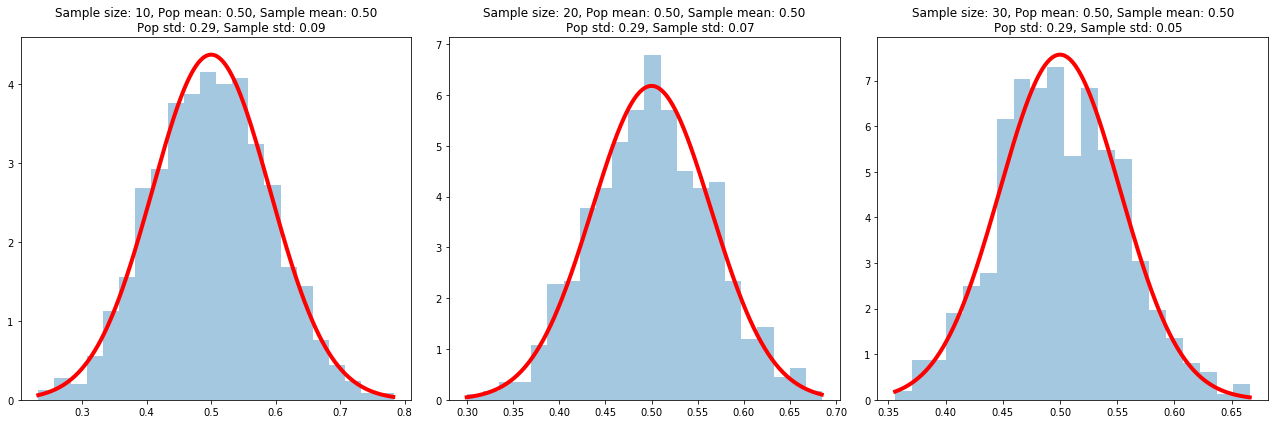

In [172]:
f, axes = plt.subplots(1, 3)
uniform_pop = {"mean": 0.5, "variance": 1/12}

for ax, sample_size in zip(axes, [10, 20, 30]):
    plot(uniform, sample_size, ax, uniform_pop)
    
plt.tight_layout()

### Exponential distribution

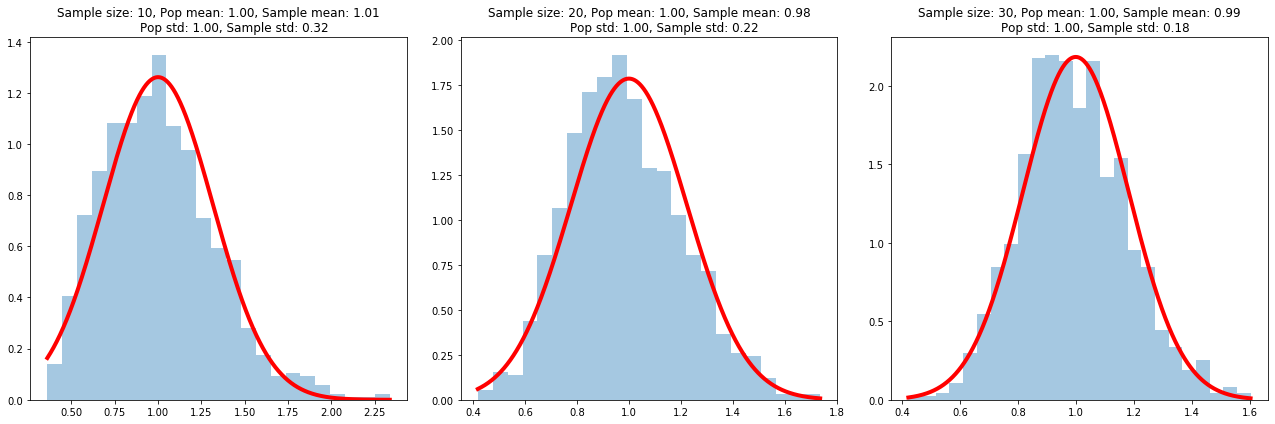

In [173]:
f, axes = plt.subplots(1, 3)
exponential_pop = {"mean": 1, "variance": 1}

for ax, sample_size in zip(axes, [10, 20, 30]):
    plot(exponential, sample_size, ax, exponential_pop)
    
plt.tight_layout()